Prepare dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/data.csv") # https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

df["y"] = df["Bankrupt?"]
df.drop("Bankrupt?", axis=1, inplace=True)

df.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,y
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490,1


Calculate imbalance in dataset

In [2]:
X, y = df.drop("y", axis=1), df["y"]

y.value_counts()[0] / len(y)

0.967737204868749

Split data into test and validation sets

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0, shuffle=True, stratify=y)

Oversampling the training data

In [4]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X_train, y_train = oversample.fit_resample(X_train, y_train)

GBT Algorithm

In [5]:
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

model_gbt = GradientBoostingClassifier(learning_rate=0.1, max_depth=6, criterion="friedman_mse", n_estimators=100, n_iter_no_change=5, tol=0.001, random_state=0)

model_gbt.fit(X_train, y_train)
y_pred = model_gbt.predict(X_val)
print(classification_report(y_true=y_val, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1980
           1       0.32      0.45      0.37        66

    accuracy                           0.95      2046
   macro avg       0.65      0.71      0.67      2046
weighted avg       0.96      0.95      0.95      2046



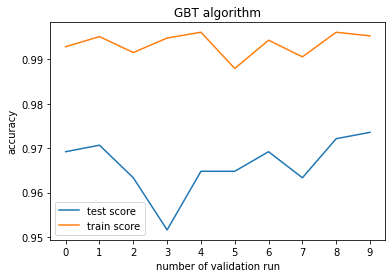

In [6]:
from sklearn.model_selection import cross_validate
import matplotlib.pylab as plt

cv = cross_validate(model_gbt, X, y, return_train_score=True, cv=10)
plt.plot(cv["test_score"], label="test score")
plt.plot(cv["train_score"], label="train score")
plt.legend(loc="lower left")
plt.xlabel("number of validation run")
plt.xticks(np.arange(0, len(cv["test_score"]), 1))
plt.ylabel("accuracy")
plt.title("GBT algorithm")
plt.show()

AdaBoost

In [7]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=0)

model_ada.fit(X_train, y_train)
y_pred = model_ada.predict(X_val)
print(classification_report(y_true=y_val, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1980
           1       0.22      0.83      0.34        66

    accuracy                           0.90      2046
   macro avg       0.61      0.87      0.64      2046
weighted avg       0.97      0.90      0.93      2046



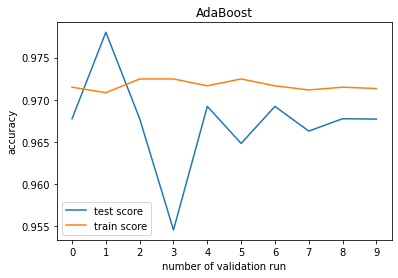

In [8]:
cv = cross_validate(model_ada, X, y, return_train_score=True, cv=10)
plt.plot(cv["test_score"], label="test score")
plt.plot(cv["train_score"], label="train score")
plt.legend(loc="lower left")
plt.xlabel("number of validation run")
plt.xticks(np.arange(0, len(cv["test_score"]), 1))
plt.ylabel("accuracy")
plt.title("AdaBoost")
plt.show()

XGBoost

In [9]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=100)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_val)
print(classification_report(y_true=y_val, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1980
           1       0.37      0.53      0.43        66

    accuracy                           0.96      2046
   macro avg       0.68      0.75      0.71      2046
weighted avg       0.96      0.96      0.96      2046



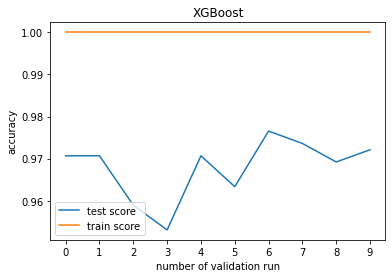

In [10]:
cv = cross_validate(model_xgb, X, y, return_train_score=True, cv=10)
plt.plot(cv["test_score"], label="test score")
plt.plot(cv["train_score"], label="train score")
plt.legend(loc="lower left")
plt.xlabel("number of validation run")
plt.xticks(np.arange(0, len(cv["test_score"]), 1))
plt.ylabel("accuracy")
plt.title("XGBoost")
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(max_depth=9, n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_val)
print(classification_report(y_true=y_val, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1980
           1       0.28      0.68      0.40        66

    accuracy                           0.93      2046
   macro avg       0.64      0.81      0.68      2046
weighted avg       0.97      0.93      0.95      2046



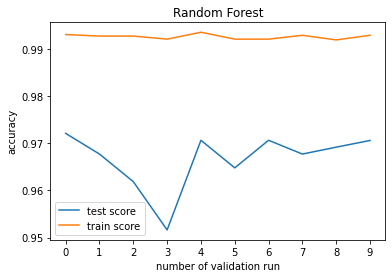

In [12]:
cv = cross_validate(model_rf, X, y, return_train_score=True, cv=10)
plt.plot(cv["test_score"], label="test score")
plt.plot(cv["train_score"], label="train score")
plt.legend(loc="lower left")
plt.xlabel("number of validation run")
plt.xticks(np.arange(0, len(cv["test_score"]), 1))
plt.ylabel("accuracy")
plt.title("Random Forest")
plt.show()